In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 1 - Load Data

In [2]:
# Load in 4 data tables
data1 = pd.read_csv('data/caracteristiques-2019.csv')
data2 = pd.read_csv('data/lieux-2019.csv')
user = pd.read_csv('data/usagers-2019.csv')
vehicle = pd.read_csv('data/vehicules-2019.csv')

In [3]:
# Check the size and number of features in each table
print(data1.shape, data2.shape, user.shape, vehicle.shape)

(58840, 15) (58840, 18) (132977, 15) (100710, 11)


In [4]:
# Check whether they have same amount of unique values
print(len(data1['Num_Acc'].unique()), len(data2['Num_Acc'].unique()), 
      len(user['Num_Acc'].unique()), len(vehicle['Num_Acc'].unique()))

58840 58840 58840 58840


# 2 - Data Manipulation

**Drop the features with >50% missing data**

In [5]:
# Drop the features with missing values > 50%
data1_todrop = []
null_check_1 = data1.isnull().sum()
null_check_dict_1 = null_check_1.to_dict()
for col in null_check_dict_1:
    if null_check_dict_1[col] > 0.5 * data1.shape[0]:
        data1_todrop.append(col)
data1 = data1.drop(columns = data1_todrop)

data2_todrop = []
null_check_2 = data2.isnull().sum()
null_check_dict_2 = null_check_2.to_dict()
for col in null_check_dict_2:
    if null_check_dict_2[col] > 0.5 * data2.shape[0]:
        data2_todrop.append(col)
data2 = data2.drop(columns = data2_todrop)

data3_todrop = []
null_check_3 = user.isnull().sum()
null_check_dict_3 = null_check_3.to_dict()
for col in null_check_dict_3:
    if null_check_dict_3[col] > 0.5 * user.shape[0]:
        data3_todrop.append(col)
data3 = user.drop(columns = data3_todrop)

data4_todrop = []
null_check_4 = vehicle.isnull().sum()
null_check_dict_4 = null_check_4.to_dict()
for col in null_check_dict_4:
    if null_check_dict_4[col] > 0.5 * vehicle.shape[0]:
        data4_todrop.append(col)
data4 = vehicle.drop(columns = data4_todrop)

In [6]:
feature_dropped = data1_todrop + data2_todrop + data3_todrop + data4_todrop
print(f'{feature_dropped} are removed from the total features, becaues >50% of the values are missing')

['v2', 'lartpc', 'larrout', 'occutc'] are removed from the total features, becaues >50% of the values are missing


**Change name to English Data1**

In [7]:
# For data1
french_name1 = list(data1.columns)
eng_name1 = ['Accident ID', 'day', 'month', 'year', 'time', 'light', 'department', 'municipality', 'agglomeration',
            'intersection', 'atmospheric conditions', 'collision type', 'postal address', 'latitude', 'lontitude']
# Rename French to English
data1 = data1.rename({french_name1[i]: eng_name1[i] for i in range(len(french_name1))}, axis=1)

In [8]:
data1.isnull().sum()

Accident ID                 0
day                       127
month                     127
year                      127
time                      127
light                     127
department                127
municipality              127
agglomeration             127
intersection              127
atmospheric conditions    127
collision type            127
postal address            554
latitude                  127
lontitude                 127
dtype: int64

**Deal with missing values in data1**

In [9]:
# Extract the rows with missing values and split them as new df
data1_na = data1.loc[data1['time'].isna()]['Accident ID'].to_frame()
data1_na[list(data1.columns.values)] = data1_na['Accident ID'].str.split(',', expand=True)
# Change data type
data1_na = data1_na.astype({'day': 'float64', 'month': 'float64', 'year': 'float64', 'time': 'float64',
                            'light': 'float64','agglomeration': 'float64',
                            'intersection': 'float64', 'atmospheric conditions': 'float64', 'collision type': 'float64',
                           'latitude': 'float64', 'lontitude': 'float64'})
data1_na.head()

,Accident ID,day,month,year,time,light,department,municipality,agglomeration,intersection,atmospheric conditions,collision type,postal address,latitude,lontitude
458,201900000459,5.0,6.0,2019.0,0.944444,5.0,93,93007,2.0,1.0,3.0,1.0,"""REPUBLIQUE (AVENUE DE LA """"COTE PAIRS""""",489352100.0,24697900.0
459,201900000460,1.0,6.0,2019.0,0.458333,1.0,93,93007,2.0,6.0,7.0,6.0,"""DESCARTES (AVENUE """"DU 43AU 180"""")Z2""",489500500.0,24661500.0
851,201900000852,21.0,9.0,2019.0,0.552083,1.0,49,49092,1.0,1.0,1.0,1.0,"route déparemantale 160 lieu-dit ""l'echo""",472265380.0,-7236830.0
1681,201900001682,13.0,8.0,2019.0,0.416667,1.0,93,93066,2.0,1.0,1.0,6.0,"""STRASBOURG NR 1 A 71 ET 2 A 34""",489361800.0,23636800.0
1709,201900001710,13.0,8.0,2019.0,0.687500,1.0,93,93007,2.0,9.0,2.0,3.0,"""PAUL VAILLANT COUTURIER (AVENUE """"DU 01",489254200.0,24658700.0


In [10]:
# Remove rows with missing values from data1
data1 = data1[data1['time'].notna()]
# Append the new data1 with df above (add back the split rows)
data1_nona = data1.append(data1_na)
# Remove column with unclear description or not seem to be relevant
data1_toremove = ['department', 'municipality', 'postal address']
data1_nona = data1_nona.drop(columns = data1_toremove)
data1_nona.isnull().sum()

Accident ID               0
day                       0
month                     0
year                      0
time                      0
light                     0
agglomeration             0
intersection              0
atmospheric conditions    0
collision type            0
latitude                  0
lontitude                 0
dtype: int64

**Add additional Features to Data1**

In [11]:
# Add additional features - date & time
data1_nona['date'] = pd.to_datetime(data1_nona[['year', 'month', 'day']])
# '{:02d}:{:02d}'.format(*divmod(minutes, 60))
data1_nona['hour'] = data1_nona['time'] * 24 // 1
data1_nona['minute'] = (data1_nona['time'] * 24 - data1_nona['hour']) * 60 // 1
#data1['second'] = round(((data1['time'] * 24 - data1['hour']) * 60 - data1['minute']) * 60)

In [12]:
data1_nona['time_dt'] = (pd.to_datetime(data1_nona['hour'].astype(int).astype(str) + ':' + 
                                       data1_nona['minute'].astype(int).astype(str), format='%H:%M').dt.time)

data1_nona.head()

,Accident ID,day,month,year,time,light,agglomeration,intersection,atmospheric conditions,collision type,latitude,lontitude,date,hour,minute,time_dt
0,201900000001,30.0,11.0,2019.0,0.062500,4.0,1.0,1.0,1.0,2.0,488962100.0,24701200.0,2019-11-30,1.0,30.0,01:30:00
1,201900000002,30.0,11.0,2019.0,0.118056,3.0,1.0,1.0,1.0,6.0,489307000.0,23688000.0,2019-11-30,2.0,50.0,02:50:00
2,201900000003,28.0,11.0,2019.0,0.635417,1.0,1.0,1.0,1.0,4.0,489358718.0,23191744.0,2019-11-28,15.0,15.0,15:15:00
3,201900000004,30.0,11.0,2019.0,0.847222,5.0,1.0,1.0,1.0,4.0,488173295.0,24281502.0,2019-11-30,20.0,19.0,20:19:00
4,201900000005,30.0,11.0,2019.0,0.166667,3.0,1.0,1.0,1.0,2.0,487763620.0,24332540.0,2019-11-30,4.0,0.0,04:00:00


In [13]:
char_raw = data1_nona.drop(columns = ['year', 'month', 'day', 'minute', 'time', 'time_dt'])

**Data2 Pre-processing**

In [14]:
# For data2
french_name2 = list(data2.columns)
eng_name2 = ['Accident ID', 'road category', 'route number', 'numerical index of the road number', 
             'traffic regime', 'total number of traffic lanes', 'existence of reserved lanes', 
             'longitudinal profile (gradient of the road)','number of associated PR (upstream terminal)', 
             'distance in meters from the PR', 'plan layout', 'surface condition', 'development - infrastructure', 
             'situation of the accident', 'maximum authorized speed at the scene and at the time of the accident']
# Rename French to English
data2 = data2.rename({french_name2[i]: eng_name2[i] for i in range(len(french_name2))}, axis=1)
data2.columns

Index(['Accident ID', 'road category', 'route number',
       'numerical index of the road number', 'traffic regime',
       'total number of traffic lanes', 'existence of reserved lanes',
       'longitudinal profile (gradient of the road)',
       'number of associated PR (upstream terminal)',
       'distance in meters from the PR', 'plan layout', 'surface condition',
       'development - infrastructure', 'situation of the accident',
       'maximum authorized speed at the scene and at the time of the accident'],
      dtype='object')

In [15]:
# Remove unclear columns
data2 = data2.drop(columns = ['route number', 'numerical index of the road number',
                             'longitudinal profile (gradient of the road)', 'number of associated PR (upstream terminal)',
                             'distance in meters from the PR'])
data2.isnull().sum()

Accident ID                                                                 0
road category                                                              26
traffic regime                                                           3171
total number of traffic lanes                                             676
existence of reserved lanes                                               695
plan layout                                                                37
surface condition                                                          47
development - infrastructure                                               71
situation of the accident                                                 142
maximum authorized speed at the scene and at the time of the accident     907
dtype: int64

In [16]:
place_raw = data2

**User table preprocessing**

In [17]:
user.head()

,Num_Acc,id_vehicule,num_veh,place,catu,grav,sexe,an_nais,trajet,secu1,secu2,secu3,locp,actp,etatp
0,201900000001,138 306 524,B01,2,2,4,2,2002,0,1,0,-1,-1,-1,-1
1,201900000001,138 306 524,B01,1,1,4,2,1993,5,1,0,-1,-1,-1,-1
2,201900000001,138 306 525,A01,1,1,1,1,1959,0,1,0,-1,-1,-1,-1
3,201900000002,138 306 523,A01,1,1,4,2,1994,0,1,0,-1,-1,-1,-1
4,201900000003,138 306 520,A01,1,1,1,1,1996,0,1,0,-1,-1,0,-1


In [18]:
user.isna().sum()

Num_Acc        0
id_vehicule    0
num_veh        0
place          0
catu           0
grav           0
sexe           0
an_nais        0
trajet         0
secu1          0
secu2          0
secu3          0
locp           0
actp           0
etatp          0
dtype: int64

In [19]:
# drop columns (not meaningful)
user = user.drop(columns = ['num_veh'])

In [20]:
# rename columns
user= user.rename({'id_vehicule': 'vehicle_id', 'catu': 'user_category',
                   'grav':'injury_level', 'sexe':'sex', 'an_nais': 'birth_date', 
                   'trajet':'travel_reason','locp':'pedestrian_location','actp':'pedestrian_action',
                   'etatp':'Accompanied'}, axis=1)

In [21]:
user

,Num_Acc,vehicle_id,place,user_category,injury_level,sex,birth_date,travel_reason,secu1,secu2,secu3,pedestrian_location,pedestrian_action,Accompanied
0,201900000001,138 306 524,2,2,4,2,2002,0,1,0,-1,-1,-1,-1
1,201900000001,138 306 524,1,1,4,2,1993,5,1,0,-1,-1,-1,-1
2,201900000001,138 306 525,1,1,1,1,1959,0,1,0,-1,-1,-1,-1
3,201900000002,138 306 523,1,1,4,2,1994,0,1,0,-1,-1,-1,-1
4,201900000003,138 306 520,1,1,1,1,1996,0,1,0,-1,-1,0,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132972,201900058837,137 982 135,1,1,4,2,1988,1,1,0,-1,-1,-1,-1
132973,201900058838,137 982 132,1,1,4,1,1998,9,1,0,-1,-1,-1,-1
132974,201900058839,137 982 131,1,1,3,1,1979,0,2,0,-1,-1,-1,-1
132975,201900058840,137 982 129,1,1,4,1,1974,0,1,0,-1,-1,0,-1


#### Column: travel reason

Reason for travel at the time of the accident:

	-1. Not specified
	0. Not specified
	1. Home. work
	2. Home. school
	3. Shopping. shopping
	4. Professional use
	5. Walk. leisure
	9. Other 

In [22]:
# travel reason: -1 and 0 both mean not specified
user.loc[user['travel_reason']==-1, ['travel_reason']]=0

<AxesSubplot:title={'center':'Histogram of users'}, xlabel='travel_reason'>

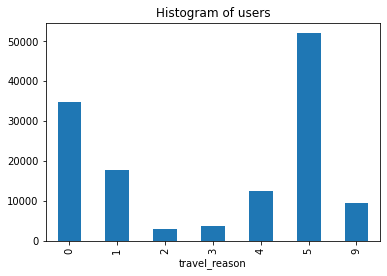

In [23]:
# plot
reason_count = pd.DataFrame(user.groupby('travel_reason').count())
reason_count['Num_Acc'].plot.bar(title='Histogram of users')

### Column: security 1, 2, and 3

For secu1, secu2 and secu3, the encodings are:

    -1. Not specified
	0. No equipment
	1. Belt
	2. Helmet
	3. Children's device
	4. reflective vest
	5. Airbag (2WD / 3WD)
	6. Gloves (2WD / 3WD)
	7. Gloves + Airbag (2WD / 3WD)
	8. Not determinable
	9. Other

In [24]:
# Set not determinable = other
user.loc[user['secu1']==9, ['secu1']]=8
user.loc[user['secu2']==9,  ['secu2']]=8
user.loc[user['secu3']==9,  ['secu3']]=8


<AxesSubplot:title={'center':'plot of secu1'}, xlabel='secu1'>

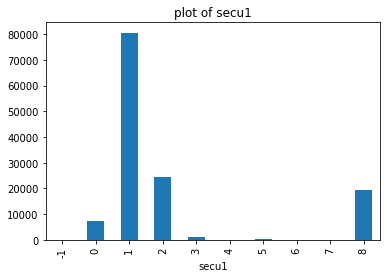

In [25]:
# plot secu1
secu_count = pd.DataFrame(user.groupby('secu1').count())
secu_count['Num_Acc'].plot.bar(title='plot of secu1')

In [26]:
#change the column into one hot encoding

# change coding of not specified to 9 in three columns
user['secu1'] = user['secu1'].replace(-1, 9)
user['secu2'] = user['secu2'].replace(-1, 9)
user['secu3'] = user['secu3'].replace(-1, 9)

# all safety equipments
secu = []
for i in range(len(user['secu1'].unique())):
    secu.append([])
    
# make secu into one hot vector
for row in range(len(user)):
    for col in range(len(user['secu1'].unique())):
        # add 0 to all columns in a row
        secu[col].append(0)
    s1 = user.iloc[row]['secu1']
    s2 = user.iloc[row]['secu2']
    s3 = user.iloc[row]['secu3']
    secu[s1][row] = 1
    secu[s2][row] = 1
    secu[s3][row] = 1
user['No equipment'] = secu[0]
user['Belt'] = secu[1]
user['Helmet'] = secu[2]
user['Children device'] = secu[3]
user['reflective vest'] = secu[4]
user['Airbag (2WD / 3WD)'] = secu[5]
user['Gloves (2WD / 3WD)'] = secu[6]
user['Gloves + Airbag (2WD / 3WD)'] = secu[7]
user['Not determinable'] = secu[8]
user['Not specified'] = secu[9]

In [27]:
# create a column for sum of securities
user['sum_secu'] = user.iloc[:, -9:-2].sum(axis=1)

In [28]:
user = user.drop(columns = ['secu1', 'secu2', 'secu3'])

### Pedestrain action (>120000 NA values)

Pedestrian action:

	-1. Not specified
Moving

	0. Not specified or not applicable
	1. Direction of colliding vehicle
	2. Opposite direction of the vehicle
Various

	3. Crossing
	4. Masked
	5. Playing. running
	6. With animal
	9. Other
	A. Get on / off the vehicle
	B. Unknown 

In [29]:
# Set Not secified = Unknown = not specified or not applicable
user.loc[user['pedestrian_action']=='B', ['pedestrian_action']]='0'
user.loc[user['pedestrian_action']=='-1', ['pedestrian_action']]='0'

<AxesSubplot:title={'center':'plot of pedstrain action'}, xlabel='pedestrian_action'>

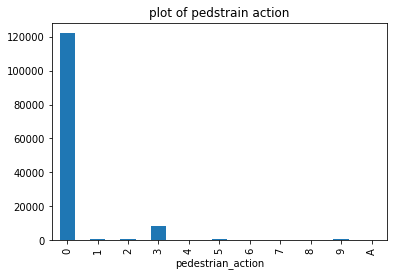

In [30]:
# plot pedistrain action
secu_count = pd.DataFrame(user.groupby('pedestrian_action').count())
secu_count['Num_Acc'].plot.bar(title='plot of pedstrain action')

In [31]:
user = user.drop(columns = ['pedestrian_action'])

### Pedistrain Location (>120000 NA values)

Pedestrian location:

	-1. Not specified
	0. Not applicable


On roadway:

	1. + 50 m from the pedestrian crossing
	2. 50 m from the pedestrian crossing
    
On pedestrian crossing :

	3. Without light signaling
	4. With light signaling
    
Divers :

	5. On sidewalk
	6. On the shoulder
	7. On refuge or BAU
	8. On the alley
	9. Unknown

In [32]:
# Set not specified = not applicable
user.loc[user['pedestrian_location']==-1, ['pedestrian_location']]= 0

<AxesSubplot:title={'center':'plot of pedstrain location'}, xlabel='pedestrian_location'>

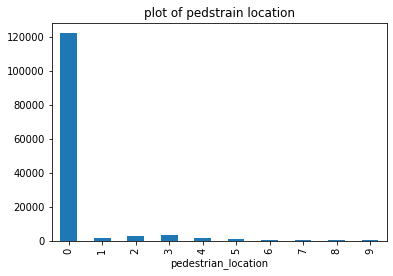

In [33]:
# plot pedistrain location
secu_count = pd.DataFrame(user.groupby('pedestrian_location').count())
secu_count['Num_Acc'].plot.bar(title='plot of pedstrain location')

In [34]:
user = user.drop(columns = ['pedestrian_location'])

### Column: Accompanied (>120000 NA values)

This variable is used to specify whether the injured pedestrian was alone or not:

	-1. Not specified
	1. Alone
	2. Accompanied
	3. In a group


<AxesSubplot:title={'center':'plot of accompanied'}, xlabel='Accompanied'>

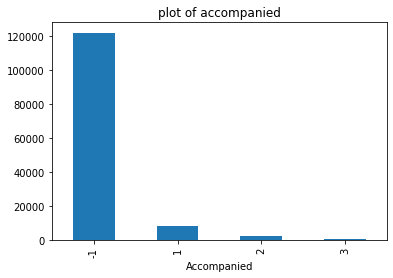

In [35]:
# plot accompanied
secu_count = pd.DataFrame(user.groupby('Accompanied').count())
secu_count['Num_Acc'].plot.bar(title='plot of accompanied')

In [36]:
user = user.drop(columns = ['Accompanied'])

### Column: birth date

In [37]:
# change birth date into age
age=[]
for i in range(len(user['birth_date'])):
    age.append(2019 - user['birth_date'][i])
    
ages = pd.Series(age, index=range(len(user['birth_date'])))
user['age']=ages.values

In [38]:
user = user.drop(columns=['birth_date'])

In [39]:
user

,Num_Acc,vehicle_id,place,user_category,injury_level,sex,travel_reason,No equipment,Belt,Helmet,Children device,reflective vest,Airbag (2WD / 3WD),Gloves (2WD / 3WD),Gloves + Airbag (2WD / 3WD),Not determinable,Not specified,sum_secu,age
0,201900000001,138 306 524,2,2,4,2,0,1,1,0,0,0,0,0,0,0,1,1,17
1,201900000001,138 306 524,1,1,4,2,5,1,1,0,0,0,0,0,0,0,1,1,26
2,201900000001,138 306 525,1,1,1,1,0,1,1,0,0,0,0,0,0,0,1,1,60
3,201900000002,138 306 523,1,1,4,2,0,1,1,0,0,0,0,0,0,0,1,1,25
4,201900000003,138 306 520,1,1,1,1,0,1,1,0,0,0,0,0,0,0,1,1,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132972,201900058837,137 982 135,1,1,4,2,1,1,1,0,0,0,0,0,0,0,1,1,31
132973,201900058838,137 982 132,1,1,4,1,9,1,1,0,0,0,0,0,0,0,1,1,21
132974,201900058839,137 982 131,1,1,3,1,0,1,0,1,0,0,0,0,0,0,1,1,40
132975,201900058840,137 982 129,1,1,4,1,0,1,1,0,0,0,0,0,0,0,1,1,45


# Change Datatype

**Characteristics dataset**

In [40]:
# Change datatype of 'date' to date
char_raw['date'] = char_raw['date'].apply(pd.to_datetime)

In [41]:
# Label whether the date is weekday or weekend/holiday
# Label whether the date is weekend (1 = weekend)
char_raw['Weekend/Holiday'] = ((pd.DatetimeIndex(char_raw['date']).dayofweek) // 5 == 1).astype(float)

# Label holidays to be 1
char_raw.loc[(char_raw['date'] == pd.to_datetime('2019-01-01')),'Weekend/Holiday'] = 1
char_raw.loc[(char_raw['date'] == pd.to_datetime('2019-04-22')),'Weekend/Holiday'] = 1
char_raw.loc[(char_raw['date'] == pd.to_datetime('2019-05-01')),'Weekend/Holiday'] = 1
char_raw.loc[(char_raw['date'] == pd.to_datetime('2019-05-08')),'Weekend/Holiday'] = 1
char_raw.loc[(char_raw['date'] == pd.to_datetime('2019-05-30')),'Weekend/Holiday'] = 1
char_raw.loc[(char_raw['date'] == pd.to_datetime('2019-06-10')),'Weekend/Holiday'] = 1
char_raw.loc[(char_raw['date'] == pd.to_datetime('2019-08-15')),'Weekend/Holiday'] = 1
char_raw.loc[(char_raw['date'] == pd.to_datetime('2019-11-01')),'Weekend/Holiday'] = 1
char_raw.loc[(char_raw['date'] == pd.to_datetime('2019-11-11')),'Weekend/Holiday'] = 1
char_raw.loc[(char_raw['date'] == pd.to_datetime('2019-12-25')),'Weekend/Holiday'] = 1
char_raw.head()

,Accident ID,light,agglomeration,intersection,atmospheric conditions,collision type,latitude,lontitude,date,hour,Weekend/Holiday
0,201900000001,4.0,1.0,1.0,1.0,2.0,488962100.0,24701200.0,2019-11-30,1.0,1.0
1,201900000002,3.0,1.0,1.0,1.0,6.0,489307000.0,23688000.0,2019-11-30,2.0,1.0
2,201900000003,1.0,1.0,1.0,1.0,4.0,489358718.0,23191744.0,2019-11-28,15.0,0.0
3,201900000004,5.0,1.0,1.0,1.0,4.0,488173295.0,24281502.0,2019-11-30,20.0,1.0
4,201900000005,3.0,1.0,1.0,1.0,2.0,487763620.0,24332540.0,2019-11-30,4.0,1.0


In [42]:
# change lat and long to correct decimal places
char_raw['latitude'] = char_raw['latitude']/10000000
char_raw['lontitude'] = char_raw['lontitude']/10000000
char_raw.head()

,Accident ID,light,agglomeration,intersection,atmospheric conditions,collision type,latitude,lontitude,date,hour,Weekend/Holiday
0,201900000001,4.0,1.0,1.0,1.0,2.0,48.896210,2.470120,2019-11-30,1.0,1.0
1,201900000002,3.0,1.0,1.0,1.0,6.0,48.930700,2.368800,2019-11-30,2.0,1.0
2,201900000003,1.0,1.0,1.0,1.0,4.0,48.935872,2.319174,2019-11-28,15.0,0.0
3,201900000004,5.0,1.0,1.0,1.0,4.0,48.817329,2.428150,2019-11-30,20.0,1.0
4,201900000005,3.0,1.0,1.0,1.0,2.0,48.776362,2.433254,2019-11-30,4.0,1.0


In [43]:
# Change col datatype from float to str
col_to_change = ['light', 'agglomeration', 'intersection', 'atmospheric conditions', 'collision type']
for col in col_to_change:
    char_raw[col] = char_raw[col].astype('str')
char_raw.dtypes

Accident ID                       object
light                             object
agglomeration                     object
intersection                      object
atmospheric conditions            object
collision type                    object
latitude                         float64
lontitude                        float64
date                      datetime64[ns]
hour                             float64
Weekend/Holiday                  float64
dtype: object

**Places dataset**

In [44]:
# Change col name
place_raw = place_raw.rename({'maximum authorized speed at the scene and at the time of the accident': 'Max Speed'}, axis=1)
place_raw.head()

,Accident ID,road category,traffic regime,total number of traffic lanes,existence of reserved lanes,plan layout,surface condition,development - infrastructure,situation of the accident,Max Speed
0,201900000001,1.0,3.0,10.0,0.0,2.0,1.0,2.0,1.0,70.0
1,201900000002,1.0,1.0,2.0,0.0,2.0,1.0,0.0,1.0,70.0
2,201900000003,1.0,3.0,8.0,0.0,3.0,1.0,0.0,1.0,90.0
3,201900000004,1.0,3.0,5.0,0.0,1.0,1.0,0.0,1.0,90.0
4,201900000005,1.0,1.0,3.0,0.0,3.0,1.0,2.0,1.0,90.0


In [45]:
# Change col datatype from float to str
for col in list(place_raw.columns):
    place_raw[col] = place_raw[col].astype('str')
place_raw['road category'] = place_raw['road category'].astype('str')
place_raw.dtypes

Accident ID                      object
road category                    object
traffic regime                   object
total number of traffic lanes    object
existence of reserved lanes      object
plan layout                      object
surface condition                object
development - infrastructure     object
situation of the accident        object
Max Speed                        object
dtype: object

## Vehicle

In [46]:
vehicle.isna().sum()

Num_Acc            0
id_vehicule        0
num_veh            0
senc               0
catv               0
obs                0
obsm               0
choc               0
manv               0
motor              0
occutc         99818
dtype: int64

### Column: occutc (number of people on public transport)

In [47]:
vehicle['occutc'] = vehicle['occutc'].fillna(0)

### Column: drop num_veh, senc (not meaningful)

In [48]:
vehicle = vehicle.drop(columns=['num_veh', 'senc', 'catv'])

In [49]:
# Rename data
vehicle= vehicle.rename({'obs': 'fixed_obstacle' ,'obsm': 'movable_obstacle',
                         'choc': 'initial_shock', 'manv': 'maneuver' , 'occutc': 'occupants_public_transport'}, axis=1)

### Column: fixed obstacle (> 80000 NA values)

ixed obstacle struck:

	-1. Not specified
	0. Not applicable
	1. Parked vehicle
	2. Tree
	3. Metal slide
	4. Concrete slide
	5. Other slide
	6. Building, wall, bridge pier
	7. Vertical signage support or emergency call station
	8. Post
	9. Street furniture
	10. Parapet
	11. Island, refuge, upper terminal
	12. Sidewalk edge
	13. Ditch, embankment, rock face
	14. Other fixed obstacle on the road
	15. Other fixed obstacle on sidewalk or shoulder
	16. Clearance of the roadway without obstacle
	17. Nozzle. aqueduct head

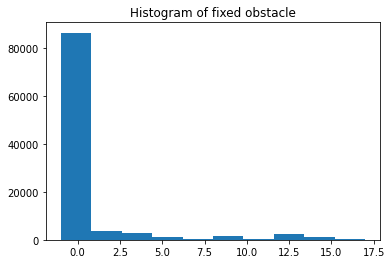

In [50]:
import matplotlib.pyplot as plt

plt.hist(vehicle['fixed_obstacle'])
plt.title('Histogram of fixed obstacle')

plt.show()

In [51]:
vehicle = vehicle.drop(columns=['fixed_obstacle'])

### Column: motor

Vehicle engine type:

	-1. Not specified
	0. Unknown
	1. Hydrocarbons
	2. Electric hybrid
	3. Electric
	4. Hydrogen
	5. Human
	6. Other 


<AxesSubplot:title={'center':'plot of motor'}, xlabel='motor'>

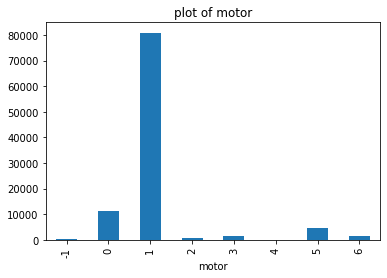

In [52]:
# plot accompanied
secu_count = pd.DataFrame(vehicle.groupby('motor').count())
secu_count['Num_Acc'].plot.bar(title='plot of motor')

In [53]:
vehicle.shape

(100710, 7)

# Exploratory Data Analysis

**Characteristic data**

In [54]:
char_raw.head()

,Accident ID,light,agglomeration,intersection,atmospheric conditions,collision type,latitude,lontitude,date,hour,Weekend/Holiday
0,201900000001,4.0,1.0,1.0,1.0,2.0,48.896210,2.470120,2019-11-30,1.0,1.0
1,201900000002,3.0,1.0,1.0,1.0,6.0,48.930700,2.368800,2019-11-30,2.0,1.0
2,201900000003,1.0,1.0,1.0,1.0,4.0,48.935872,2.319174,2019-11-28,15.0,0.0
3,201900000004,5.0,1.0,1.0,1.0,4.0,48.817329,2.428150,2019-11-30,20.0,1.0
4,201900000005,3.0,1.0,1.0,1.0,2.0,48.776362,2.433254,2019-11-30,4.0,1.0


average number of accident per week is 1131.2


<ipython-input-55-abe87d6e4082>:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(ax2_xlabels, rotation=20)
<ipython-input-55-abe87d6e4082>:48: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax6.set_xticklabels(ax6_xlabels)


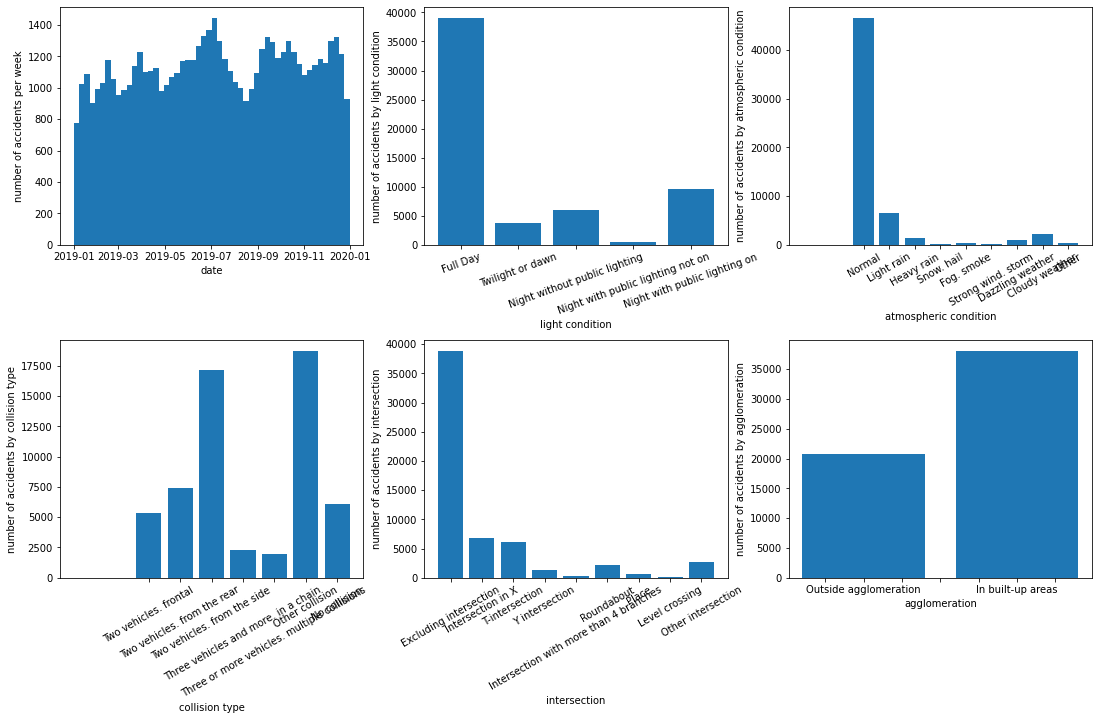

In [55]:
# Number of accident by week
num_days = (data1_nona['date'].max()-data1_nona['date'].min()).days
print(f'average number of accident per week is {round(data1_nona.shape[0]/num_days,1)*7}')
#print('Road Condition just FYI since there is no total traffic, it is not informative')

fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3)
fig.set_size_inches(18.5, 10.5)
plt.subplots_adjust(wspace=0.2, hspace=0.4)

ax1.hist(data1_nona['date'], bins = 52)
ax1.set_xlabel('date')
ax1.set_ylabel('number of accidents per week')

ax2.bar(data1_nona['light'].value_counts().index,data1_nona['light'].value_counts().values)
ax2_xlabels = ['', 'Full Day', 'Twilight or dawn', 'Night without public lighting',
                    'Night with public lighting not on', 'Night with public lighting on']
ax2.set_xticklabels(ax2_xlabels, rotation=20)
ax2.set_xlabel('light condition')
ax2.set_ylabel('number of accidents by light condition')

ax3.bar(data1_nona['atmospheric conditions'].value_counts().index,data1_nona['atmospheric conditions'].value_counts().values)
ax3_xlabels = ['Normal', 'Light rain', 'Heavy rain', 'Snow. hail', 'Fog. smoke', 'Strong wind. storm',
              'Dazzling weather', 'Cloudy weather', 'Other']
ax3.set_xticks([1,2,3,4,5,6,7,8,9])
ax3.set_xticklabels(ax3_xlabels, rotation=30)
ax3.set_xlabel('atmospheric condition')
ax3.set_ylabel('number of accidents by atmospheric condition')

ax4.bar(data1_nona['collision type'].value_counts().index,data1_nona['collision type'].value_counts().values)
ax4_xlabels = ['Two vehicles. frontal', 'Two vehicles. from the rear', 'Two vehicles. from the side', 
               'Three vehicles and more. in a chain', 'Three or more vehicles. multiple collisions', 
               'Other collision', 'No collision']
ax4.set_xticks([1,2,3,4,5,6,7])
ax4.set_xticklabels(ax4_xlabels, rotation=30)
ax4.set_xlabel('collision type')
ax4.set_ylabel('number of accidents by collision type')

ax5.bar(data1_nona['intersection'].value_counts().index,data1_nona['intersection'].value_counts().values)
ax5_xlabels = ['Excluding intersection', 'Intersection in X', 'T-intersection', 'Y intersection', 
               'Intersection with more than 4 branches', 'Roundabout', 'Place', 'Level crossing', 'Other intersection']
ax5.set_xticks([1,2,3,4,5,6,7,8,9])
ax5.set_xticklabels(ax5_xlabels, rotation=30)
ax5.set_xlabel('intersection')
ax5.set_ylabel('number of accidents by intersection')

ax6.bar(data1_nona['agglomeration'].value_counts().index,data1_nona['agglomeration'].value_counts().values)
ax6_xlabels = ['','', 'Outside agglomeration','','','', 'In built-up areas']
ax6.set_xticklabels(ax6_xlabels)
ax6.set_xlabel('agglomeration')
ax6.set_ylabel('number of accidents by agglomeration')
plt.show()

In [56]:
# Split char_raw into weekday vs weekend/holiday since they are mostly like to show different behaviors
char_weekday = char_raw.loc[char_raw['Weekend/Holiday'] == 0, :]
char_weekend = char_raw.loc[char_raw['Weekend/Holiday'] == 1, :]

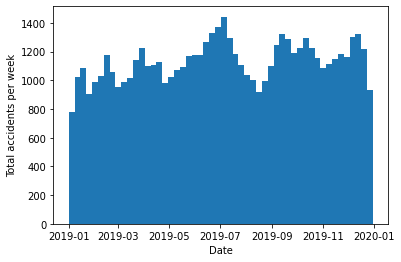

The average accidents per week is 1131.5384615384614


In [57]:
# Plot trend on weekly total accident
#plt.figure(figsize = (16,6))
plt.hist(char_raw['date'], bins = 52)
plt.xlabel('Date')
plt.ylabel('Total accidents per week')
#plt.xticks(rotation=90)
plt.show()

print(f'The average accidents per week is {char_raw.shape[0]/52}')

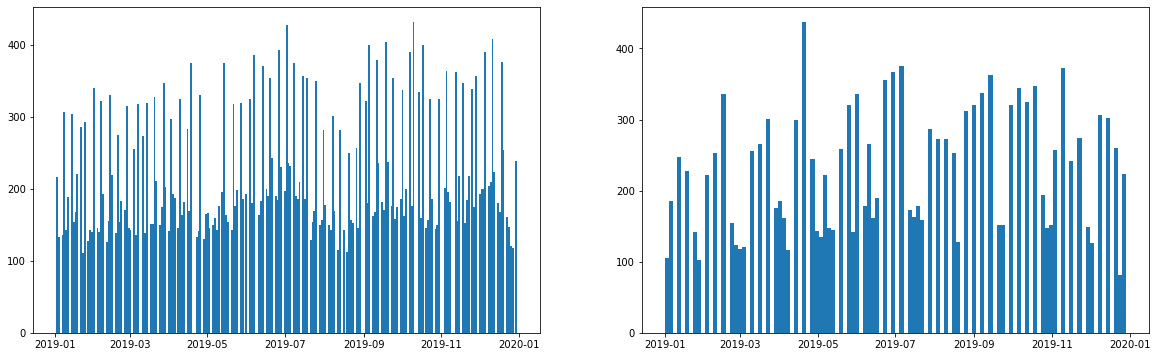

The daily average for weekday is 168.800796812749
The daily average for weekend/holiday is 144.48245614035088


In [58]:
# Plot daily average accidents for weekdays vs weekends/holidays
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(20, 6)
#plt.subplots_adjust(wspace=0.2, hspace=0.4)
ax1.hist(char_weekday['date'], bins = len(char_weekday['date'].unique())) #weekday
ax2.hist(char_weekend['date'], bins = len(char_weekend['date'].unique())) #weekend
plt.show()

wkday_avg = char_weekday['date'].count()/len(char_weekday['date'].unique())
wkend_avg = char_weekend['date'].count()/len(char_weekend['date'].unique())
print(f'The daily average for weekday is {wkday_avg}')
print(f'The daily average for weekend/holiday is {wkend_avg}')

In [59]:
# Look for seasonality - prep data
acc_by_date = pd.DataFrame(char_raw.groupby(['date']).count().loc[:,'Accident ID'])
acc_by_date.head()

,Accident ID
date,
2019-01-01,105
2019-01-02,107
2019-01-03,109
2019-01-04,133
2019-01-05,103


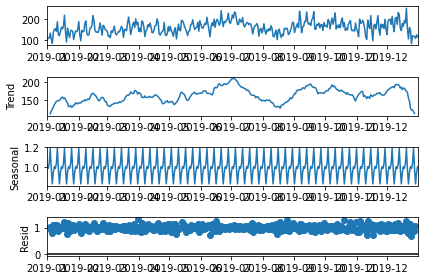

In [60]:
# Look for seasonality - model
from statsmodels.tsa.seasonal import seasonal_decompose

#data_orig.set_index('Date', inplace=True)

analysis = acc_by_date[['Accident ID']].copy()


decompose_result_mult = seasonal_decompose(analysis, model="multiplicative")

trend = decompose_result_mult.trend
seasonal = decompose_result_mult.seasonal
residual = decompose_result_mult.resid

decompose_result_mult.plot();

Peak: Fri; Down: Sun


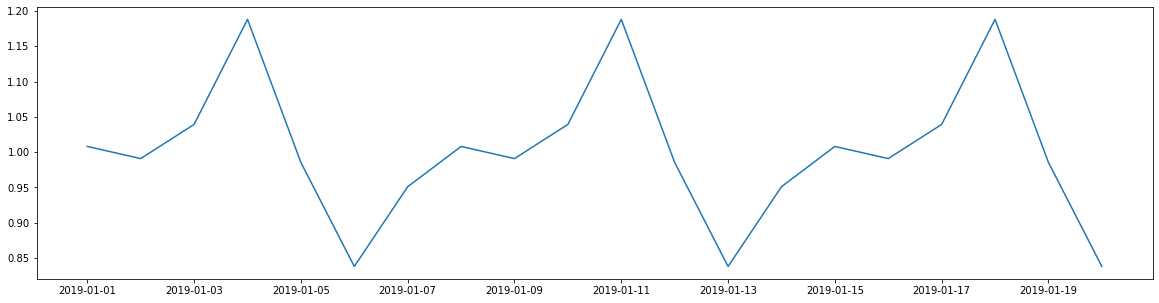

In [61]:
# Look for seasonality - zoom in days
char_seasonality = pd.DataFrame(seasonal).reset_index()
plt.figure(figsize = (20,5))
plt.plot(char_seasonality['date'][0:20], char_seasonality['seasonal'][0:20])
print('Peak: Fri; Down: Sun')

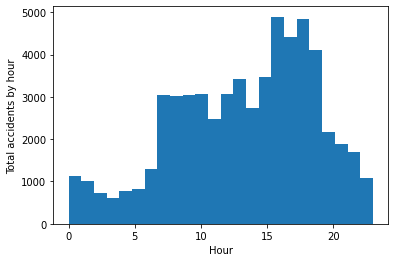

In [62]:
# Find the accident distribution by time - overall
plt.hist(char_raw['hour'], bins = 24)
plt.xlabel('Hour')
plt.ylabel('Total accidents by hour')
#plt.xticks(rotation=90)
plt.show()


In [63]:
# Calc % of accident happens 16 - 20 pm
num_acc_16_20 = char_raw.loc[(char_raw['hour'] >= 16) & (char_raw['hour'] <= 19), 'hour'].count()
perc_acc_16_20 = num_acc_16_20/char_raw.shape[0]
perc_acc_16_20
print(f'{perc_acc_16_20} of the accidents happened between 16pm - 20pm')

0.3104860639021074 of the accidents happened between 16pm - 20pm


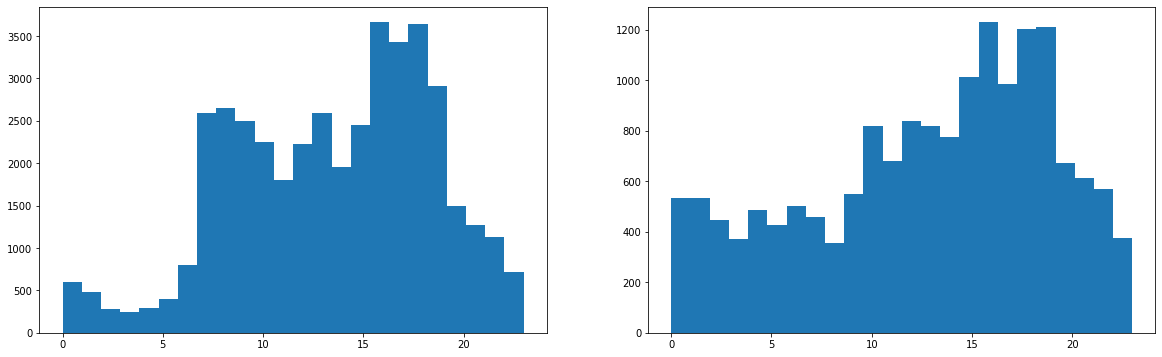

The accident peak time for both weekdays and weekends are 16 - 20pm, but weekdays have extrdenary low accidents before 7am


In [64]:
# Find the accident distribution by time - weekdays vs weekends/holidays
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(20, 6)
#plt.subplots_adjust(wspace=0.2, hspace=0.4)
ax1.hist(char_weekday['hour'], bins = 24) #weekday
ax2.hist(char_weekend['hour'], bins = 24) #weekend
plt.show()

print('The accident peak time for both weekdays and weekends are 16 - 20pm, but weekdays have extrdenary low accidents before 7am')

light - majority of the accidents happened on lights full day
agglomeration - location
intersection - majority of the accidents happened on Excluding intersection
Atmospheric conditions - majority of the accidents happened under normal whether
Collision type - majority of the accidents happened other and Two vehicles. from the side 


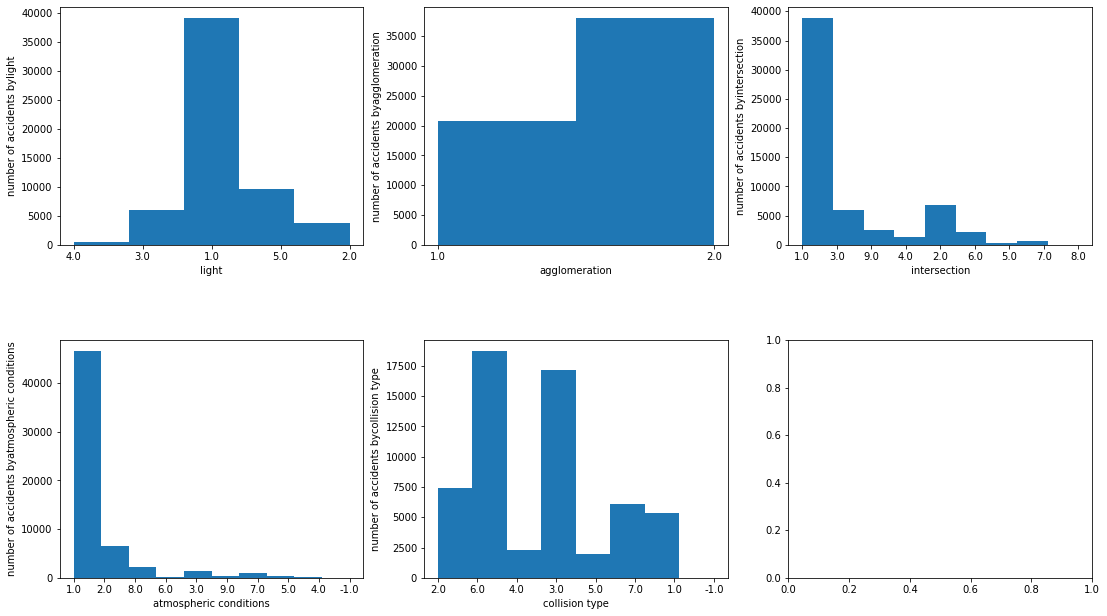

In [65]:
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3)
fig.set_size_inches(18.5, 10.5)
plt.subplots_adjust(wspace=0.2, hspace=0.4)

ax_list = [ax1, ax2, ax3, ax4, ax5]
feature_list = ['light', 'agglomeration', 'intersection', 'atmospheric conditions', 'collision type']

for i in range(len(ax_list)):
    ax_list[i].hist(char_raw[feature_list[i]], bins = len(char_raw[feature_list[i]].unique()))
    ax_list[i].set_xlabel(feature_list[i])
    ax_list[i].set_ylabel('number of accidents by' + feature_list[i])
print('light - majority of the accidents happened on lights full day')
print('agglomeration - location')
print('intersection - majority of the accidents happened on Excluding intersection')
print('Atmospheric conditions - majority of the accidents happened under normal whether')
print('Collision type - majority of the accidents happened other and Two vehicles. from the side ')

plt.show()

In [66]:
#char_raw = char_raw.drop(columns = ['collision type'])
char_raw.head()

,Accident ID,light,agglomeration,intersection,atmospheric conditions,collision type,latitude,lontitude,date,hour,Weekend/Holiday
0,201900000001,4.0,1.0,1.0,1.0,2.0,48.896210,2.470120,2019-11-30,1.0,1.0
1,201900000002,3.0,1.0,1.0,1.0,6.0,48.930700,2.368800,2019-11-30,2.0,1.0
2,201900000003,1.0,1.0,1.0,1.0,4.0,48.935872,2.319174,2019-11-28,15.0,0.0
3,201900000004,5.0,1.0,1.0,1.0,4.0,48.817329,2.428150,2019-11-30,20.0,1.0
4,201900000005,3.0,1.0,1.0,1.0,2.0,48.776362,2.433254,2019-11-30,4.0,1.0


In [67]:
char_raw.to_csv('Cleaned Data/Final/Characteristics.csv', index = False)

**Place data**

In [68]:
place_raw.head()

,Accident ID,road category,traffic regime,total number of traffic lanes,existence of reserved lanes,plan layout,surface condition,development - infrastructure,situation of the accident,Max Speed
0,201900000001,1.0,3.0,10.0,0.0,2.0,1.0,2.0,1.0,70.0
1,201900000002,1.0,1.0,2.0,0.0,2.0,1.0,0.0,1.0,70.0
2,201900000003,1.0,3.0,8.0,0.0,3.0,1.0,0.0,1.0,90.0
3,201900000004,1.0,3.0,5.0,0.0,1.0,1.0,0.0,1.0,90.0
4,201900000005,1.0,1.0,3.0,0.0,3.0,1.0,2.0,1.0,90.0


road category - majority of the accidents happened on Departmental and Communal roads
traffic regime - majority of the accidents happened on Bidirectional roads
total number of traffic lanes - majority of the accidents happened on roads with 2 lanes
existence of reserved lanes - majority of the accidents happened on roads with this info missing
plan layout - majority of the accidents happened on roads with rectilinear part
surface condition - majority of the accidents happened on roads with normal condition
development - infrastructure - majority of the accidents happened on roads with this info missing
situation of the accident - majority of the accidents happened on the road
Max Speed - majority of the accidents happened on roads with speed limit 50


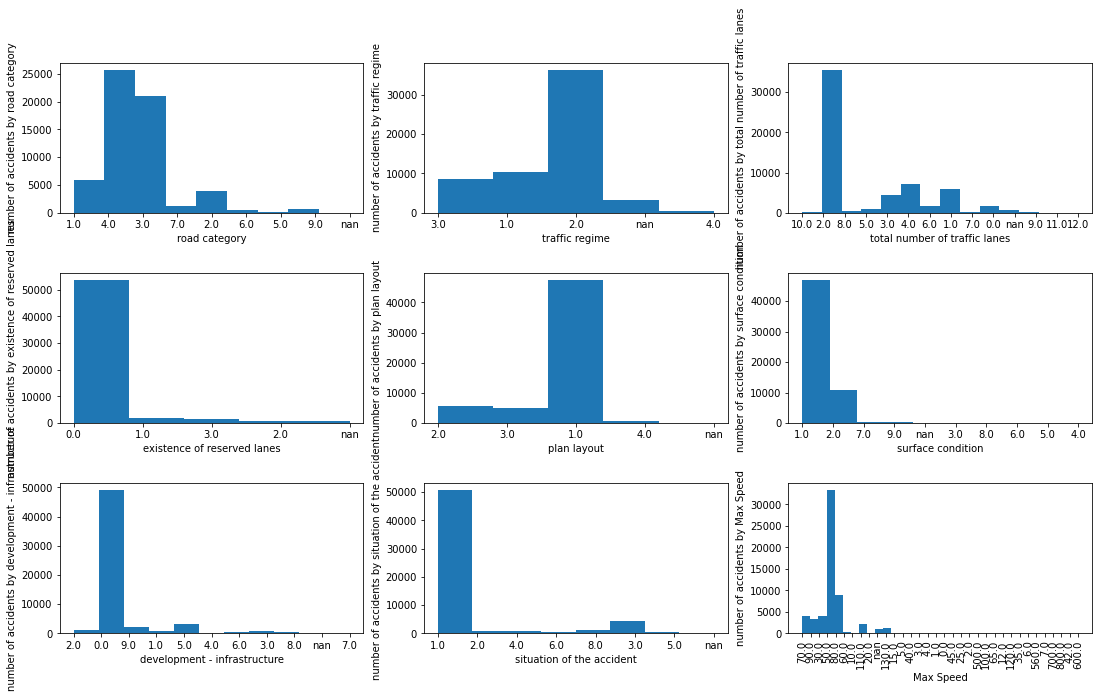

In [69]:
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6), (ax7, ax8, ax9)) = plt.subplots(3, 3)
fig.set_size_inches(18.5, 10.5)
plt.subplots_adjust(wspace=0.2, hspace=0.4)

ax1.hist(place_raw['road category'], bins = 9)
ax1.set_xlabel('road category')
ax1.set_ylabel('number of accidents by road category')
print('road category - majority of the accidents happened on Departmental and Communal roads')

ax2.hist(place_raw['traffic regime'], bins = 5)
ax2.set_xlabel('traffic regime')
ax2.set_ylabel('number of accidents by traffic regime')
print('traffic regime - majority of the accidents happened on Bidirectional roads')

ax3.hist(place_raw['total number of traffic lanes'], bins = len(place_raw['total number of traffic lanes'].unique()))
ax3.set_xlabel('total number of traffic lanes')
ax3.set_ylabel('number of accidents by total number of traffic lanes')
print('total number of traffic lanes - majority of the accidents happened on roads with 2 lanes')

ax4.hist(place_raw['existence of reserved lanes'], bins = len(place_raw['existence of reserved lanes'].unique()))
ax4.set_xlabel('existence of reserved lanes')
ax4.set_ylabel('number of accidents by existence of reserved lanes')
print('existence of reserved lanes - majority of the accidents happened on roads with this info missing')

ax5.hist(place_raw['plan layout'], bins = len(place_raw['plan layout'].unique()))
ax5.set_xlabel('plan layout')
ax5.set_ylabel('number of accidents by plan layout')
print('plan layout - majority of the accidents happened on roads with rectilinear part')

ax6.hist(place_raw['surface condition'], bins = len(place_raw['surface condition'].unique()))
ax6.set_xlabel('surface condition')
ax6.set_ylabel('number of accidents by surface condition')
print('surface condition - majority of the accidents happened on roads with normal condition')

ax7.hist(place_raw['development - infrastructure'], bins = len(place_raw['development - infrastructure'].unique()))
ax7.set_xlabel('development - infrastructure')
ax7.set_ylabel('number of accidents by development - infrastructure')
print('development - infrastructure - majority of the accidents happened on roads with this info missing')

ax8.hist(place_raw['situation of the accident'], bins = len(place_raw['situation of the accident'].unique()))
ax8.set_xlabel('situation of the accident')
ax8.set_ylabel('number of accidents by situation of the accident')
print('situation of the accident - majority of the accidents happened on the road')

ax9.hist(place_raw['Max Speed'], bins = len(place_raw['Max Speed'].unique()))
ax9.set_xlabel('Max Speed')
ax9.set_ylabel('number of accidents by Max Speed')
plt.setp(ax9.xaxis.get_majorticklabels(), rotation=90)
print('Max Speed - majority of the accidents happened on roads with speed limit 50')

plt.show()

In [70]:
# Majority data NA - ['existence of reserved lanes','development - infrastructure']
# Majority data in one label - ['plan layout', 'surface condition', 'situation of the accident']
place_raw = place_raw.drop(columns = ['existence of reserved lanes','development - infrastructure'])#,
                         #'plan layout', 'surface condition', 'situation of the accident'])
place_raw.head()

,Accident ID,road category,traffic regime,total number of traffic lanes,plan layout,surface condition,situation of the accident,Max Speed
0,201900000001,1.0,3.0,10.0,2.0,1.0,1.0,70.0
1,201900000002,1.0,1.0,2.0,2.0,1.0,1.0,70.0
2,201900000003,1.0,3.0,8.0,3.0,1.0,1.0,90.0
3,201900000004,1.0,3.0,5.0,1.0,1.0,1.0,90.0
4,201900000005,1.0,1.0,3.0,3.0,1.0,1.0,90.0


In [71]:
place_raw.to_csv('Cleaned Data/Final/Places.csv', index = False)

## User visualization

In [72]:
injury_str = []
for i in user['injury_level']:
    if i == 1:
        injury_str.append('Unharmed')
    elif i == 2:
        injury_str.append('Killed')
    elif i==3:
        injury_str.append('Injured hospitalized')
    elif i==4:
        injury_str.append('Slightly injured')


In [73]:
injury_str = pd.Series(injury_str, index=range(132977))

In [74]:
user['injury_str'] = injury_str

In [75]:
# change user category labels
user_str = []
for i in user['user_category']:
    if i == 1:
        user_str.append('Driver')
    elif i == 2:
        user_str.append('Passenger')
    elif i==3:
        user_str.append('Pedestrian')

injury_str = pd.Series(user_str, index=range(132977))
user['user_str'] = user_str

In [76]:
user.shape

(132977, 21)

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Injured hospitalized'),
  Text(1, 0, 'Killed'),
  Text(2, 0, 'Slightly injured'),
  Text(3, 0, 'Unharmed')])

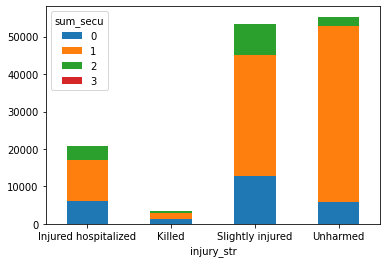

In [77]:
user.groupby(['injury_str' , 'sum_secu']).count()['Num_Acc'].unstack('sum_secu').plot(kind='bar', stacked=True)
plt.xticks(rotation = 0)

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Injured hospitalized'),
  Text(1, 0, 'Killed'),
  Text(2, 0, 'Slightly injured'),
  Text(3, 0, 'Unharmed')])

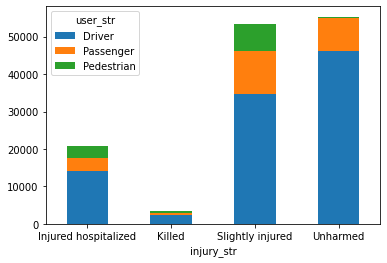

In [78]:
#user category
user.groupby(['injury_str' , 'user_str']).count()['Num_Acc'].unstack('user_str').plot(kind='bar', stacked=True)
plt.xticks(rotation = 0)

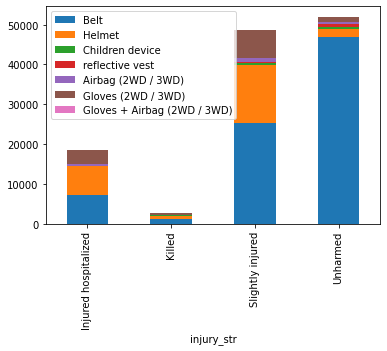

In [79]:
user.groupby('injury_str').sum()[['Belt','Helmet',
                                  'Children device', 'reflective vest','Airbag (2WD / 3WD)',
                                  'Gloves (2WD / 3WD)', 'Gloves + Airbag (2WD / 3WD)',]].plot(kind='bar', stacked=True).legend(loc='upper left')

# Merge Data

In [80]:
char_raw.columns

Index(['Accident ID', 'light', 'agglomeration', 'intersection',
       'atmospheric conditions', 'collision type', 'latitude', 'lontitude',
       'date', 'hour', 'Weekend/Holiday'],
      dtype='object')

In [81]:
place_raw.columns

Index(['Accident ID', 'road category', 'traffic regime',
       'total number of traffic lanes', 'plan layout', 'surface condition',
       'situation of the accident', 'Max Speed'],
      dtype='object')

In [82]:
# Merged char and place
char_place = pd.concat([char_raw, place_raw], axis=1)
char_place_df = char_place.iloc[:,~char_place.columns.duplicated()]
char_place_df.shape

(58840, 18)

In [83]:
user.columns

Index(['Num_Acc', 'vehicle_id', 'place', 'user_category', 'injury_level',
       'sex', 'travel_reason', 'No equipment', 'Belt', 'Helmet',
       'Children device', 'reflective vest', 'Airbag (2WD / 3WD)',
       'Gloves (2WD / 3WD)', 'Gloves + Airbag (2WD / 3WD)', 'Not determinable',
       'Not specified', 'sum_secu', 'age', 'injury_str', 'user_str'],
      dtype='object')

In [84]:
vehicle.columns

Index(['Num_Acc', 'id_vehicule', 'movable_obstacle', 'initial_shock',
       'maneuver', 'motor', 'occupants_public_transport'],
      dtype='object')

In [85]:
# Rename vehicle table
vehicle = vehicle.rename({'id_vehicule': 'vehicle_id'}, axis = 1)
vehicle.columns

Index(['Num_Acc', 'vehicle_id', 'movable_obstacle', 'initial_shock',
       'maneuver', 'motor', 'occupants_public_transport'],
      dtype='object')

In [86]:
vehicle

,Num_Acc,vehicle_id,movable_obstacle,initial_shock,maneuver,motor,occupants_public_transport
0,201900000001,138 306 524,2,5,23,1,0.0
1,201900000001,138 306 525,0,3,11,1,0.0
2,201900000002,138 306 523,0,1,0,1,0.0
3,201900000003,138 306 520,2,1,2,1,0.0
4,201900000003,138 306 521,0,4,2,1,0.0
...,...,...,...,...,...,...,...
100705,201900058837,137 982 135,2,1,2,1,0.0
100706,201900058838,137 982 132,0,1,21,0,0.0
100707,201900058839,137 982 131,0,7,1,1,0.0
100708,201900058840,137 982 129,2,4,0,2,0.0


In [87]:
# Merged user and vehicle
user_vehicle_df = user.merge(vehicle, on = 'vehicle_id', how = 'left')
user_vehicle_df = user_vehicle_df.iloc[:,~user_vehicle_df.columns.duplicated()]
#user_vehicle_df

In [88]:
# Drop identifiers and duplicated cols from user vehicle merge table
user_vehicle_df = user_vehicle_df.drop(['vehicle_id', 'Num_Acc_y', 'injury_str', 'user_str'], axis = 1)

In [89]:
user_vehicle_df = user_vehicle_df.rename({'Num_Acc_x': 'Accident ID'}, axis = 1)
user_vehicle_df['Accident ID'] = user_vehicle_df['Accident ID'].astype(str)
user_vehicle_df

,Accident ID,place,user_category,injury_level,sex,travel_reason,No equipment,Belt,Helmet,Children device,...,Gloves + Airbag (2WD / 3WD),Not determinable,Not specified,sum_secu,age,movable_obstacle,initial_shock,maneuver,motor,occupants_public_transport
0,201900000001,2,2,4,2,0,1,1,0,0,...,0,0,1,1,17,2,5,23,1,0.0
1,201900000001,1,1,4,2,5,1,1,0,0,...,0,0,1,1,26,2,5,23,1,0.0
2,201900000001,1,1,1,1,0,1,1,0,0,...,0,0,1,1,60,0,3,11,1,0.0
3,201900000002,1,1,4,2,0,1,1,0,0,...,0,0,1,1,25,0,1,0,1,0.0
4,201900000003,1,1,1,1,0,1,1,0,0,...,0,0,1,1,23,2,1,2,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132972,201900058837,1,1,4,2,1,1,1,0,0,...,0,0,1,1,31,2,1,2,1,0.0
132973,201900058838,1,1,4,1,9,1,1,0,0,...,0,0,1,1,21,0,1,21,0,0.0
132974,201900058839,1,1,3,1,0,1,0,1,0,...,0,0,1,1,40,0,7,1,1,0.0
132975,201900058840,1,1,4,1,0,1,1,0,0,...,0,0,1,1,45,2,4,0,2,0.0


In [90]:
print(user_vehicle_df.dtypes)
print(char_place_df.dtypes)

Accident ID                     object
place                            int64
user_category                    int64
injury_level                     int64
sex                              int64
travel_reason                    int64
No equipment                     int64
Belt                             int64
Helmet                           int64
Children device                  int64
reflective vest                  int64
Airbag (2WD / 3WD)               int64
Gloves (2WD / 3WD)               int64
Gloves + Airbag (2WD / 3WD)      int64
Not determinable                 int64
Not specified                    int64
sum_secu                         int64
age                              int64
movable_obstacle                 int64
initial_shock                    int64
maneuver                         int64
motor                            int64
occupants_public_transport     float64
dtype: object
Accident ID                              object
light                                    

In [91]:
# Merged 2 merged tables (4 tables together)
merged = char_place_df.merge(user_vehicle_df, on = 'Accident ID', how = 'right')
merged_df = merged.iloc[:,~merged.columns.duplicated()].drop(['Accident ID', 'date'], axis = 1)
merged_df

,light,agglomeration,intersection,atmospheric conditions,collision type,latitude,lontitude,hour,Weekend/Holiday,road category,...,Gloves + Airbag (2WD / 3WD),Not determinable,Not specified,sum_secu,age,movable_obstacle,initial_shock,maneuver,motor,occupants_public_transport
0,4.0,1.0,1.0,1.0,2.0,48.896210,2.470120,1.0,1.0,1.0,...,0,0,1,1,17,2,5,23,1,0.0
1,4.0,1.0,1.0,1.0,2.0,48.896210,2.470120,1.0,1.0,1.0,...,0,0,1,1,26,2,5,23,1,0.0
2,4.0,1.0,1.0,1.0,2.0,48.896210,2.470120,1.0,1.0,1.0,...,0,0,1,1,60,0,3,11,1,0.0
3,3.0,1.0,1.0,1.0,6.0,48.930700,2.368800,2.0,1.0,1.0,...,0,0,1,1,25,0,1,0,1,0.0
4,1.0,1.0,1.0,1.0,4.0,48.935872,2.319174,15.0,0.0,1.0,...,0,0,1,1,23,2,1,2,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132972,1.0,1.0,1.0,8.0,4.0,48.576900,7.726900,7.0,0.0,1.0,...,0,0,1,1,31,2,1,2,1,0.0
132973,4.0,1.0,1.0,1.0,6.0,48.771700,2.345760,2.0,1.0,1.0,...,0,0,1,1,21,0,1,21,0,0.0
132974,1.0,1.0,1.0,1.0,7.0,48.777289,2.223759,15.0,1.0,1.0,...,0,0,1,1,40,0,7,1,1,0.0
132975,3.0,1.0,1.0,1.0,2.0,48.835124,2.175110,20.0,0.0,1.0,...,0,0,1,1,45,2,4,0,2,0.0


In [92]:
merged_df.dtypes

light                             object
agglomeration                     object
intersection                      object
atmospheric conditions            object
collision type                    object
latitude                         float64
lontitude                        float64
hour                             float64
Weekend/Holiday                  float64
road category                     object
traffic regime                    object
total number of traffic lanes     object
plan layout                       object
surface condition                 object
situation of the accident         object
Max Speed                         object
place                              int64
user_category                      int64
injury_level                       int64
sex                                int64
travel_reason                      int64
No equipment                       int64
Belt                               int64
Helmet                             int64
Children device 

In [93]:
features = merged_df.drop(columns = ['injury_level']).columns
len(features)

37

In [94]:
to_onehot_list = ['light', 'agglomeration', 'intersection','atmospheric conditions', 'collision type', 'Weekend/Holiday',
                  'road category', 'traffic regime', 'plan layout', 'surface condition', 'situation of the accident',
                  'place', 'user_category', 'sex', 'travel_reason', 'movable_obstacle', 'initial_shock', 'maneuver', 'motor']
merged_df[to_onehot_list] = merged_df[to_onehot_list].astype(str)
merged_df.dtypes

light                             object
agglomeration                     object
intersection                      object
atmospheric conditions            object
collision type                    object
latitude                         float64
lontitude                        float64
hour                             float64
Weekend/Holiday                   object
road category                     object
traffic regime                    object
total number of traffic lanes     object
plan layout                       object
surface condition                 object
situation of the accident         object
Max Speed                         object
place                             object
user_category                     object
injury_level                       int64
sex                               object
travel_reason                     object
No equipment                       int64
Belt                               int64
Helmet                             int64
Children device 

In [95]:
# Merged table after onehot - final
merge_onehot = pd.get_dummies(merged_df)
merge_onehot

,latitude,lontitude,hour,injury_level,No equipment,Belt,Helmet,Children device,reflective vest,Airbag (2WD / 3WD),...,maneuver_8,maneuver_9,motor_-1,motor_0,motor_1,motor_2,motor_3,motor_4,motor_5,motor_6
0,48.896210,2.470120,1.0,4,1,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,48.896210,2.470120,1.0,4,1,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,48.896210,2.470120,1.0,1,1,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,48.930700,2.368800,2.0,4,1,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,48.935872,2.319174,15.0,1,1,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132972,48.576900,7.726900,7.0,4,1,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
132973,48.771700,2.345760,2.0,4,1,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
132974,48.777289,2.223759,15.0,3,1,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
132975,48.835124,2.175110,20.0,4,1,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [96]:
merge_onehot.to_csv('Cleaned Data/Final/Merge_AllFeatures.csv', index = False)